# Titanic Survival Prediction 

&emsp;This popular dataset for machine learning practice is from [Kaggle](https://www.kaggle.com/competitions/titanic/overview). The objective is to create a classification model to predict the survival of the unfortunate passengers of the ship using features such as `age`, `gender`, `ticket price`, etc.

1. [Import Dataset & Libraries](#import)
2. [Exploratory Data Analysis](#eda)

# Import Dataset & Libraries<a id='import'></a>

In [79]:
# Array and dataframe
import numpy as np
import pandas as pd
# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use("fivethirtyeight")
import seaborn as sns
# Preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
# Modelling Preparation
from sklearn.model_selection import train_test_split
# Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
# Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# Evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [34]:
# Dataset
train = pd.read_csv("https://raw.githubusercontent.com/moscmh/titanic/main/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/moscmh/titanic/main/test.csv")
print("train:", train.shape)
print("test:", test.shape)

train: (891, 12)
test: (418, 11)


&emsp;891 instances in the training set are given for modelling to ultimately make prediction on the 418 instances in the test set.

In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory Data Analysis<a id='eda'></a>

In [37]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


&emsp;`PassengerId` and `Name` are removed since they have all the unique values for each passenger.

In [41]:
train.drop(columns=['PassengerId', 'Name'], inplace=True)
test.drop(columns=['PassengerId', 'Name'], inplace=True)

## `Survived`

In [52]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

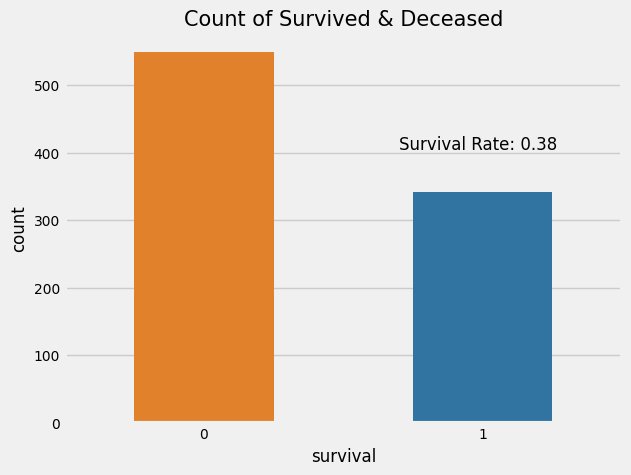

In [82]:
plot = sns.countplot(train, x='Survived', width=.5, palette=['tab:orange', 'tab:blue'])
plot.text(.7, 405, f"Survival Rate: {round(train['Survived'].value_counts()[1]/train.shape[0], 2)}", fontsize=12)
plt.title("Count of Survived & Deceased", fontsize=15)
plt.tick_params('both', labelsize=10)
plt.xlabel('survival', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.show()